<a href="https://colab.research.google.com/github/singhnidh/machine-learning-lab/blob/main/Handwritten_Digit_Recognition_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Handwritten Digit Recognition Using Random Forest**

In [ ]:
 #import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
#read train and test files
train_file = pd.read_csv('/content/rANDOM_FOREST_train.csv')
test_file = pd.read_csv('/content/Random_forest_test.csv')

In [ ]:
#view first 5 records of train_file
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#view first 5 records of test_file
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [ ]:
num_train,num_validation

(33600, 8400)

In [ ]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [ ]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


#**Visualize Training Data**

Label: 4


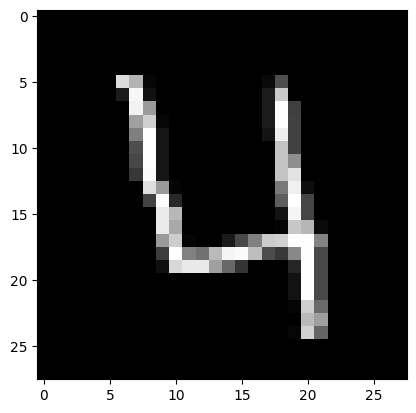

In [ ]:
index=3
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [ ]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [ ]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9645238095238096


In [ ]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[839   0   0   0   0   1   6   0   6   0]
 [  0 936   3   3   2   2   0   1   3   0]
 [  5   0 771   5   5   2   2   3   6   2]
 [  1   1  18 833   0  12   1   4   7   5]
 [  1   2   0   0 781   0   6   0   3  18]
 [  2   1   2  11   1 714   6   0   7   3]
 [  5   2   0   0   3   5 815   0   1   0]
 [  0   3   8   2   2   0   0 858   2   9]
 [  1   7   2   3   4   5   3   1 769   7]
 [  5   3   6  12  11   3   0   9   5 786]]


#**View wrong predictions**

Predicted 3 as 5


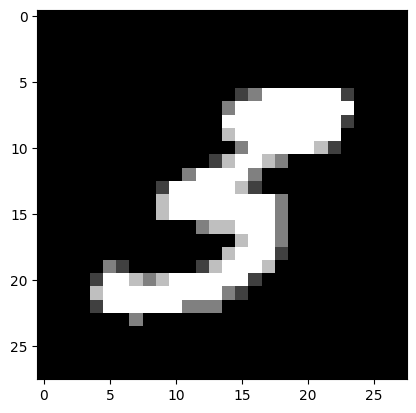

In [ ]:
index=3
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " +
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')

In [ ]:

x_test=test_file


In [ ]:
#predict test data
prediction_test = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#**View predictions for Test data**

Predicted 7


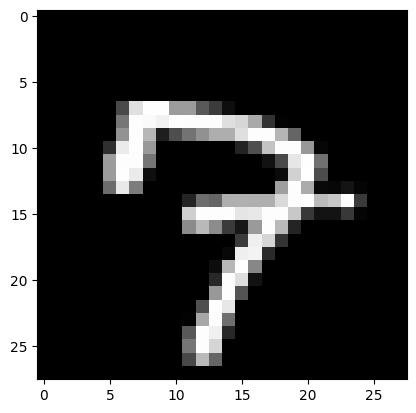

In [ ]:
index=5
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')